In [1]:
%matplotlib inline
import os
os.chdir('/home/chapmaca/Projects/pointcloudclassifier')
import pandas as pd
import numpy as np
from itertools import combinations
import joblib
from src.tools.pc_tools import geometric_median, point_to_line_dist, dbscan_cluster, build_box, whats_in_the_box, plot_box
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from src.features.build_features import pole_feature_list

In [38]:
infile = './data/processed/sandiego383.txt'


In [39]:
data = pd.read_csv(infile)
ind = np.arange(0, len(data))
#y = data.label.apply(lambda row: 1 if row in wires else 0)
#X_test = data.copy().drop(['label', 'conf'], axis=1)
X_test = data[pole_feature_list]

In [40]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size = .33)


In [41]:
pole_find = joblib.load('models/pole_knn_v1.2.joblib')
poles = pole_find.predict(StandardScaler().fit_transform(X_test))

In [42]:
del pole_find

In [55]:
pole_clusters = np.full(len(data), -1)
pole_clusters[poles.astype(bool)] = dbscan_cluster(data[['X', 'Y', 'Z']][poles.astype(bool)],min_samples=3, eps=30).labels_
data['pole_clusters'] = pd.DataFrame(pole_clusters, index=data.index)
data['pole_clusters'].head()

Found 25 clusters in the data. With 228 noise points.


0   -1
1   -1
2   -1
3   -1
4   -1
Name: pole_clusters, dtype: int64

In [56]:
pole_set = list(set(data['pole_clusters']))
pole_set.remove(-1)

In [85]:
offset = 20 #distance on either side of a pole-to-pole line in which to search for points.
min_points = 5
min_pole_dist = 20
quads = 4
height = 10
outfile = "sandiego383"

[[6264507.03  1914993.82 ]
 [6264535.853 1914997.086]
 [6264533.556 1914996.363]
 [6264533.821 1914996.868]
 [6264506.415 1914987.718]]
Not enough points!
Not enough points!
Not enough points!
Not enough points!
Interim pole!
Not enough points!
Not enough points!
Interim pole!
Found line.
X:  [6264290.21899937 6264066.1029658 ]
Y:  [1915465.15449942 1913950.1714947 ]


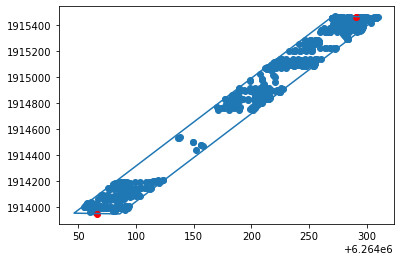

Not enough points!
Found line.
X:  [6264290.21899937 6264129.83800049]
Y:  [1915465.15449942 1914130.70700063]


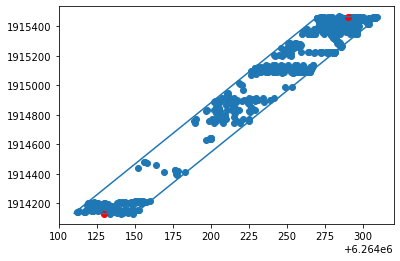

Not enough points!
Interim pole!
Found line.
X:  [6264290.21899937 6264051.55098226]
Y:  [1915465.15449942 1914267.23049446]


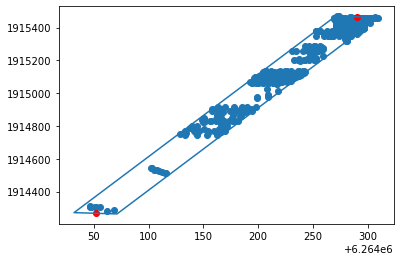

Interim pole!
Interim pole!
Interim pole!
Not enough points!
Not enough points!
Found line.
X:  [6264290.21899937 6262716.94498921]
Y:  [1915465.15449942 1914540.0475234 ]


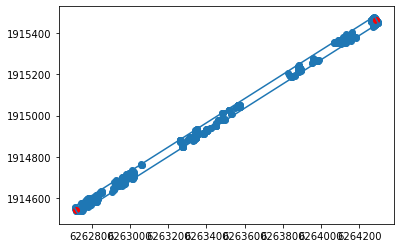

Found line.
X:  [6264290.21899937 6263613.50693471]
Y:  [1915465.15449942 1913960.85406254]


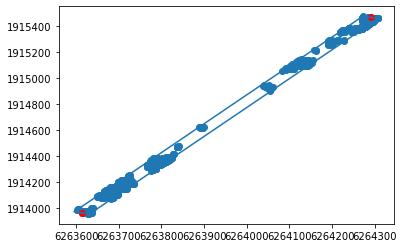

Not enough points!
Found line.
X:  [6264290.21899937 6263616.19948183]
Y:  [1915465.15449942 1915184.73849636]


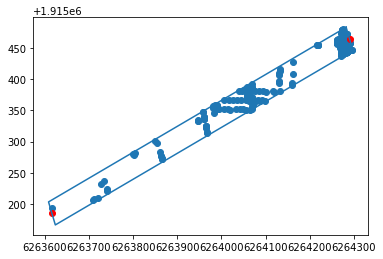

Not enough points!
Not enough points!
Interim pole!
Not enough points!
Interim pole!
Not enough points!
Not enough points!
Not enough points!
Interim pole!
Not enough points!
Not enough points!
Not enough points!
Interim pole!
Not enough points!
Interim pole!
Not enough points!
Not enough points!
Not enough points!
Not enough points!
Found line.
X:  [6264066.57999628 6262716.94498921]
Y:  [1915093.4630002 1914540.0475234]


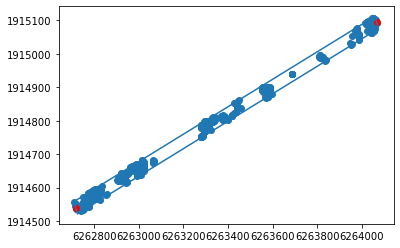

Not enough points!
Not enough points!
Not enough points!
Not enough points!
Not enough points!
Not enough points!
Not enough points!
Interim pole!
Interim pole!
Not enough points!
Interim pole!
Not enough points!
Not enough points!
Not enough points!
Interim pole!
Not enough points!
Not enough points!
Not enough points!
Not enough points!
Found line.
X:  [6264588.66949994 6263336.84449983]
Y:  [1914959.88700006 1914442.97699995]


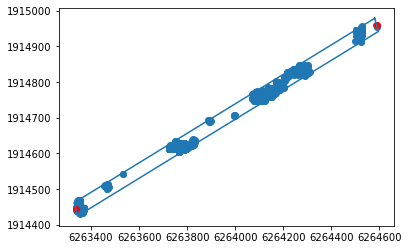

Not enough points!
Found line.
X:  [6264588.66949994 6262716.94498921]
Y:  [1914959.88700006 1914540.0475234 ]


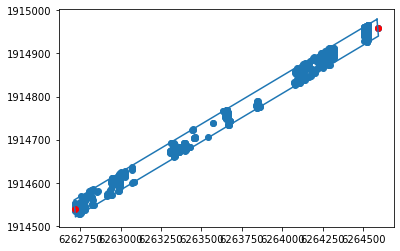

Not enough points!
Not enough points!
Interim pole!
Found line.
X:  [6264588.66949994 6262679.11749894]
Y:  [1914959.88700006 1915306.1485048 ]


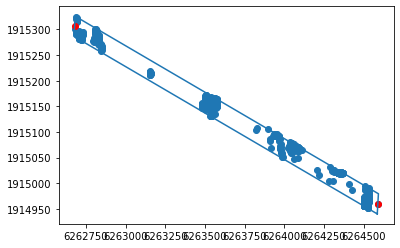

Not enough points!
Not enough points!
Not enough points!
Interim pole!
Interim pole!
Not enough points!
Not enough points!
Not enough points!
Interim pole!
Not enough points!
Interim pole!
Not enough points!
Interim pole!
Interim pole!
Interim pole!
Interim pole!
Interim pole!
Not enough points!
Not enough points!
Interim pole!
Interim pole!
Not enough points!
Not enough points!
Interim pole!
Interim pole!
Not enough points!
Not enough points!
Not enough points!
Not enough points!
Interim pole!
Interim pole!
Interim pole!
Interim pole!
Interim pole!
Not enough points!
Not enough points!
Interim pole!
Not enough points!
Not enough points!
Not enough points!
Found line.
X:  [6264336.67900006 6262679.11749894]
Y:  [1913811.12950041 1915306.1485048 ]


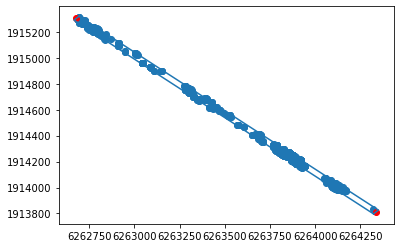

Not enough points!
Not enough points!
Not enough points!
Interim pole!
Interim pole!
Interim pole!
Interim pole!
Interim pole!
Interim pole!
Not enough points!
Not enough points!
Not enough points!
Not enough points!
Interim pole!
Not enough points!
Interim pole!
Interim pole!
Not enough points!
Interim pole!
Not enough points!
Interim pole!
Not enough points!
Interim pole!
Not enough points!
Not enough points!
Not enough points!
Not enough points!
Not enough points!
Not enough points!
Not enough points!
Not enough points!
Interim pole!
Interim pole!
Not enough points!
Not enough points!
Not enough points!
Found line.
X:  [6264388.46299337 6262679.11749894]
Y:  [1913880.52801838 1915306.1485048 ]


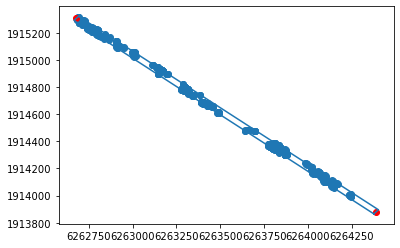

Not enough points!
Not enough points!
Not enough points!
Not enough points!
Not enough points!
Interim pole!
Not enough points!
Not enough points!
Not enough points!
Not enough points!
Found line.
X:  [6264411.18850032 6263336.84449983]
Y:  [1913934.30550176 1914442.97699995]


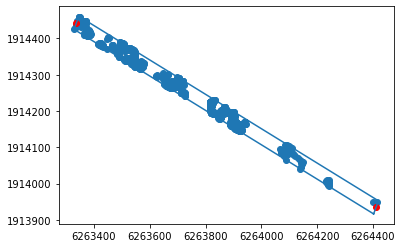

Found line.
X:  [6264411.18850032 6262895.39499927]
Y:  [1913934.30550176 1914684.38199975]


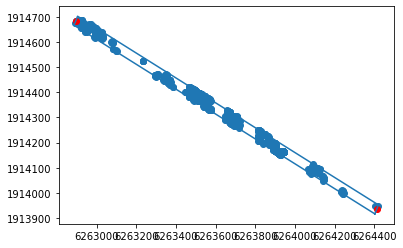

Interim pole!
Interim pole!
Not enough points!
Not enough points!
Found line.
X:  [6264411.18850032 6262679.11749894]
Y:  [1913934.30550176 1915306.1485048 ]


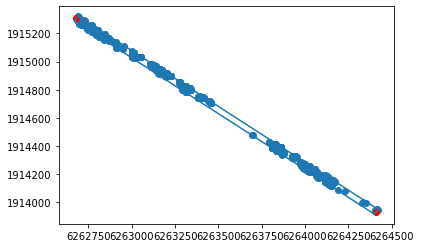

Not enough points!
Not enough points!
Not enough points!
Not enough points!
Found line.
X:  [6264453.18799868 6263387.95400662]
Y:  [1913973.60850061 1914026.99700969]


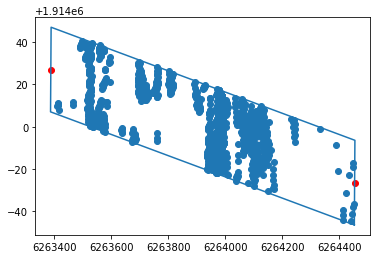

Interim pole!
Found line.
X:  [6264453.18799868 6263548.86449979]
Y:  [1913973.60850061 1914162.11850506]


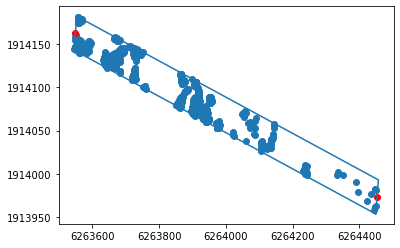

Not enough points!
Found line.
X:  [6264453.18799868 6263530.48350444]
Y:  [1913973.60850061 1914257.43853164]


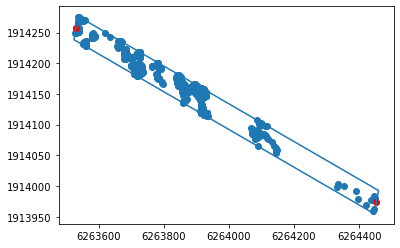

Interim pole!
Interim pole!
Interim pole!
Interim pole!
Interim pole!
Not enough points!
Interim pole!
Not enough points!
Not enough points!
Not enough points!
Found line.
X:  [6264066.1029658  6263387.95400662]
Y:  [1913950.1714947  1914026.99700969]


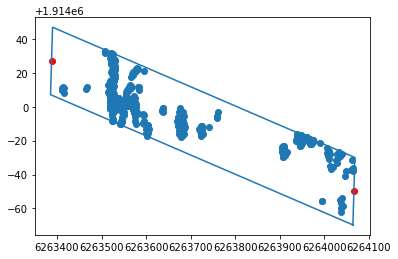

Found line.
X:  [6264066.1029658  6264051.55098226]
Y:  [1913950.1714947  1914267.23049446]


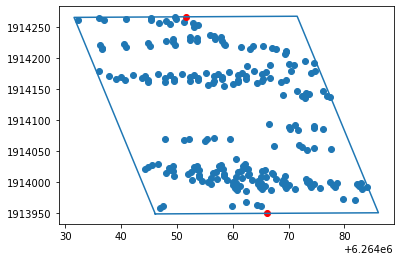

Found line.
X:  [6264066.1029658  6263548.86449979]
Y:  [1913950.1714947  1914162.11850506]


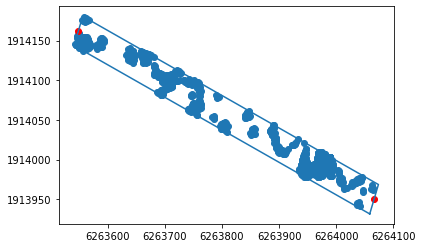

Found line.
X:  [6264066.1029658  6263547.58849874]
Y:  [1913950.1714947  1914195.86249993]


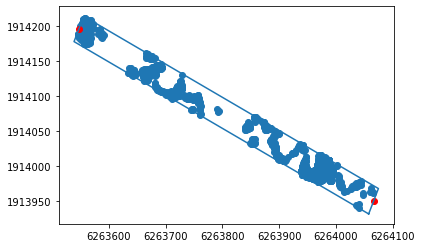

Found line.
X:  [6264066.1029658  6263530.48350444]
Y:  [1913950.1714947  1914257.43853164]


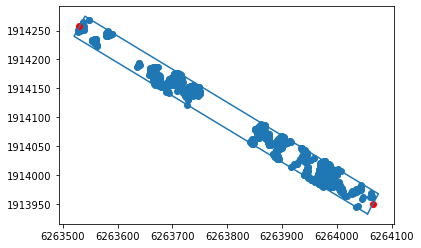

Found line.
X:  [6264066.1029658  6263336.84449983]
Y:  [1913950.1714947  1914442.97699995]


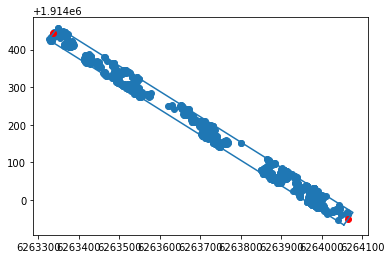

Found line.
X:  [6264066.1029658  6262895.39499927]
Y:  [1913950.1714947  1914684.38199975]


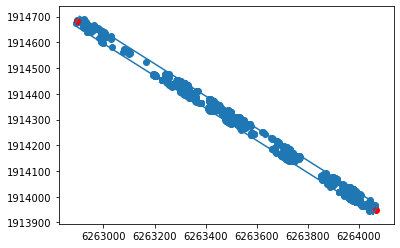

Interim pole!
Not enough points!
Not enough points!
Not enough points!
Found line.
X:  [6264066.1029658  6262679.11749894]
Y:  [1913950.1714947 1915306.1485048]


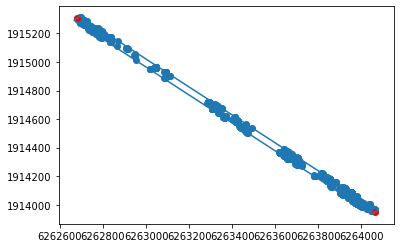

Not enough points!
Not enough points!
Not enough points!
Not enough points!
Interim pole!
Interim pole!
Interim pole!
Interim pole!
Interim pole!
Found line.
X:  [6264451.89946761 6262716.94498921]
Y:  [1914139.18400565 1914540.0475234 ]


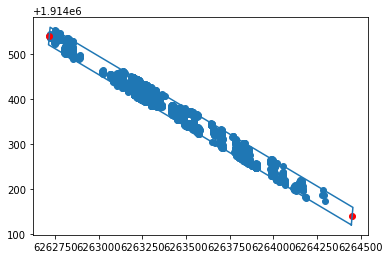

Not enough points!
Not enough points!
Not enough points!
Not enough points!
Not enough points!
Found line.
X:  [6264129.83800049 6263387.95400662]
Y:  [1914130.70700063 1914026.99700969]


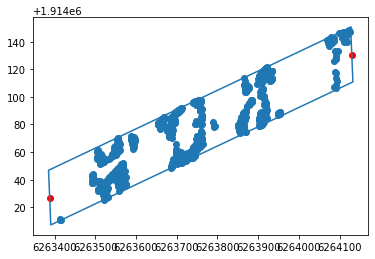

Found line.
X:  [6264129.83800049 6264051.55098226]
Y:  [1914130.70700063 1914267.23049446]


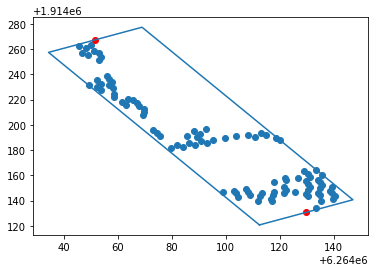

Not enough points!
Found line.
X:  [6264129.83800049 6263547.58849874]
Y:  [1914130.70700063 1914195.86249993]


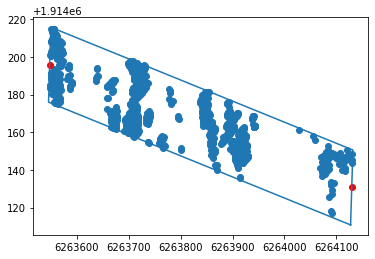

Found line.
X:  [6264129.83800049 6263530.48350444]
Y:  [1914130.70700063 1914257.43853164]


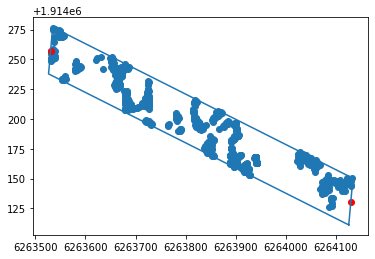

Found line.
X:  [6264129.83800049 6263336.84449983]
Y:  [1914130.70700063 1914442.97699995]


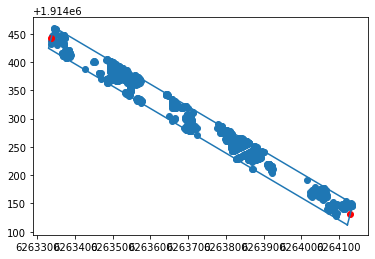

Found line.
X:  [6264129.83800049 6262895.39499927]
Y:  [1914130.70700063 1914684.38199975]


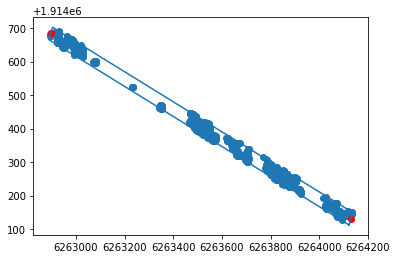

Found line.
X:  [6264129.83800049 6262716.94498921]
Y:  [1914130.70700063 1914540.0475234 ]


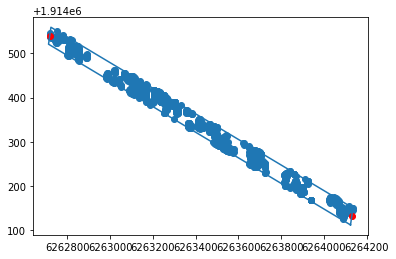

Found line.
X:  [6264129.83800049 6263613.50693471]
Y:  [1914130.70700063 1913960.85406254]


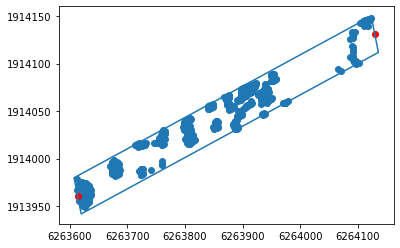

Not enough points!
Interim pole!
Found line.
X:  [6264129.83800049 6262679.11749894]
Y:  [1914130.70700063 1915306.1485048 ]


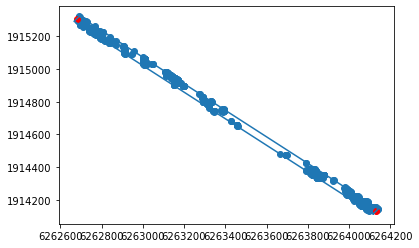

Found line.
X:  [6264186.11849455 6263387.95400662]
Y:  [1914174.98802646 1914026.99700969]


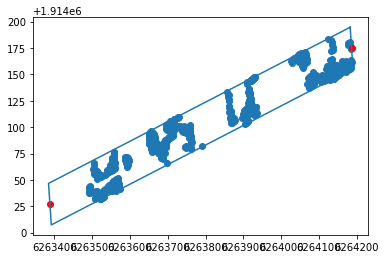

Not enough points!
Found line.
X:  [6264186.11849455 6263548.86449979]
Y:  [1914174.98802646 1914162.11850506]


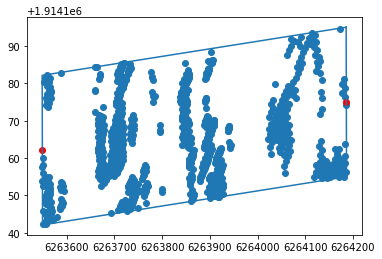

Found line.
X:  [6264186.11849455 6263547.58849874]
Y:  [1914174.98802646 1914195.86249993]


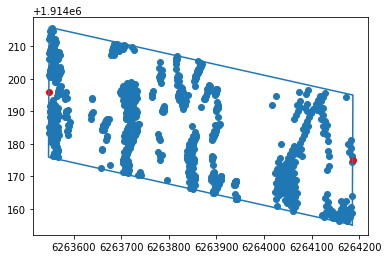

Found line.
X:  [6264186.11849455 6263530.48350444]
Y:  [1914174.98802646 1914257.43853164]


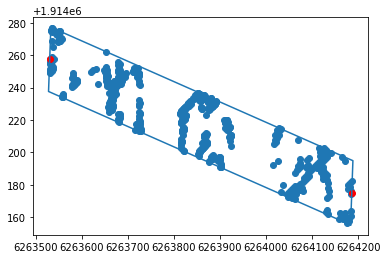

Found line.
X:  [6264186.11849455 6263336.84449983]
Y:  [1914174.98802646 1914442.97699995]


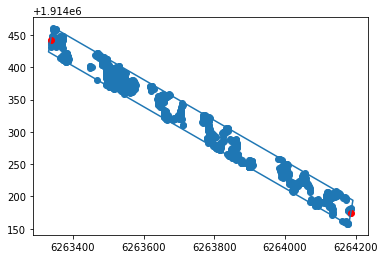

Found line.
X:  [6264186.11849455 6262895.39499927]
Y:  [1914174.98802646 1914684.38199975]


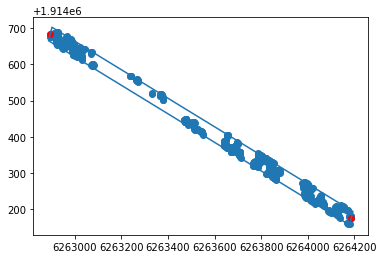

Found line.
X:  [6264186.11849455 6262716.94498921]
Y:  [1914174.98802646 1914540.0475234 ]


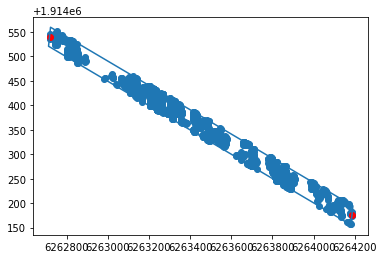

Found line.
X:  [6264186.11849455 6263613.50693471]
Y:  [1914174.98802646 1913960.85406254]


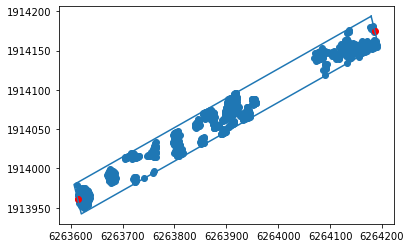

Not enough points!
Not enough points!
Interim pole!
Found line.
X:  [6263387.95400662 6264051.55098226]
Y:  [1914026.99700969 1914267.23049446]


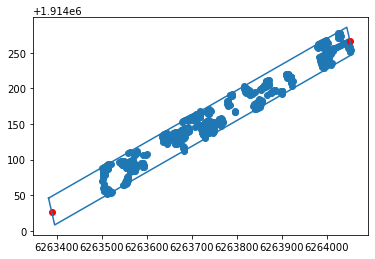

Not enough points!
Not enough points!
Not enough points!
Not enough points!
Found line.
X:  [6263387.95400662 6262895.39499927]
Y:  [1914026.99700969 1914684.38199975]


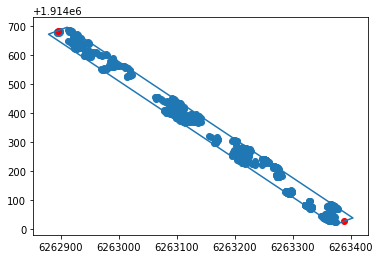

Not enough points!
Found line.
X:  [6263387.95400662 6263613.50693471]
Y:  [1914026.99700969 1913960.85406254]


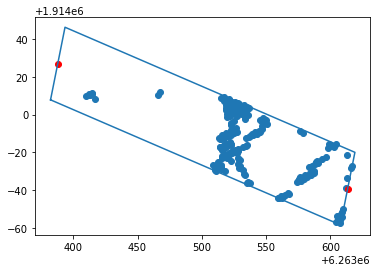

Interim pole!
Not enough points!
Found line.
X:  [6263387.95400662 6262679.11749894]
Y:  [1914026.99700969 1915306.1485048 ]


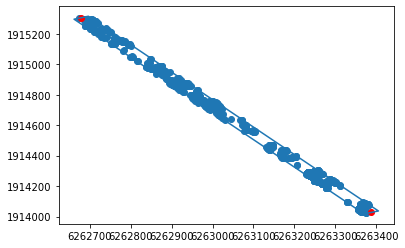

Found line.
X:  [6264051.55098226 6263548.86449979]
Y:  [1914267.23049446 1914162.11850506]


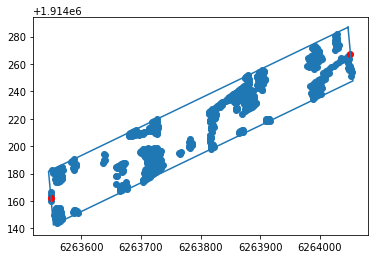

Found line.
X:  [6264051.55098226 6263547.58849874]
Y:  [1914267.23049446 1914195.86249993]


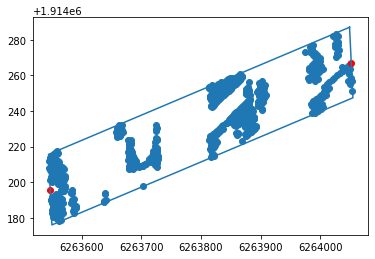

Found line.
X:  [6264051.55098226 6263530.48350444]
Y:  [1914267.23049446 1914257.43853164]


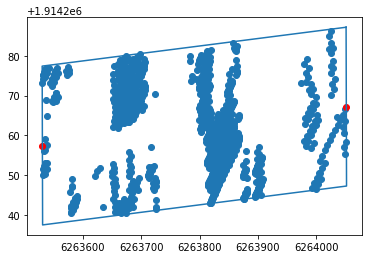

Found line.
X:  [6264051.55098226 6263336.84449983]
Y:  [1914267.23049446 1914442.97699995]


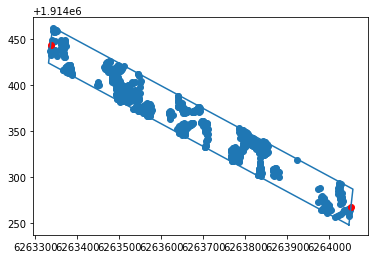

Found line.
X:  [6264051.55098226 6262895.39499927]
Y:  [1914267.23049446 1914684.38199975]


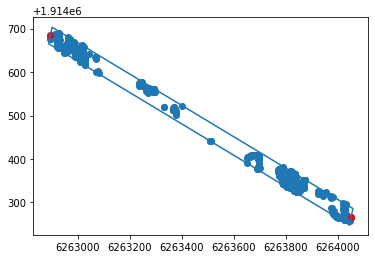

Found line.
X:  [6264051.55098226 6262716.94498921]
Y:  [1914267.23049446 1914540.0475234 ]


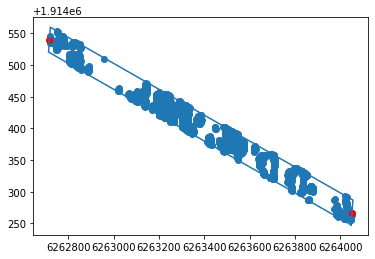

Found line.
X:  [6264051.55098226 6263613.50693471]
Y:  [1914267.23049446 1913960.85406254]


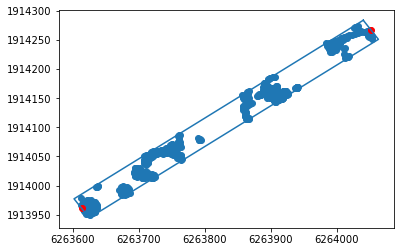

Not enough points!
Not enough points!
Not enough points!
Found line.
X:  [6263548.86449979 6263547.58849874]
Y:  [1914162.11850506 1914195.86249993]


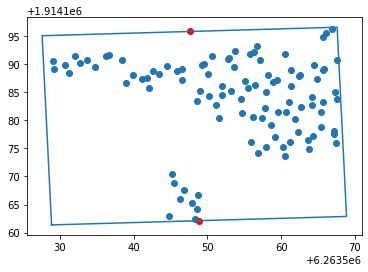

Interim pole!
Interim pole!
Found line.
X:  [6263548.86449979 6262895.39499927]
Y:  [1914162.11850506 1914684.38199975]


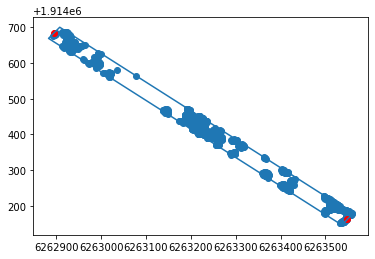

Found line.
X:  [6263548.86449979 6262716.94498921]
Y:  [1914162.11850506 1914540.0475234 ]


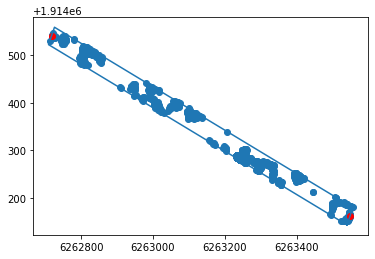

Found line.
X:  [6263548.86449979 6263613.50693471]
Y:  [1914162.11850506 1913960.85406254]


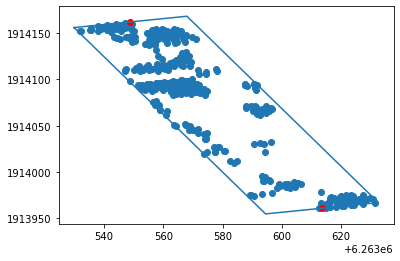

Interim pole!
Interim pole!
Interim pole!
Not enough points!
Found line.
X:  [6263547.58849874 6263336.84449983]
Y:  [1914195.86249993 1914442.97699995]


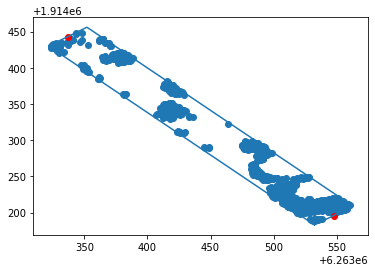

Found line.
X:  [6263547.58849874 6262895.39499927]
Y:  [1914195.86249993 1914684.38199975]


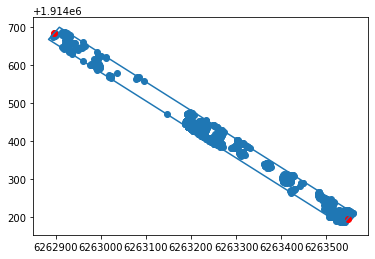

Found line.
X:  [6263547.58849874 6262716.94498921]
Y:  [1914195.86249993 1914540.0475234 ]


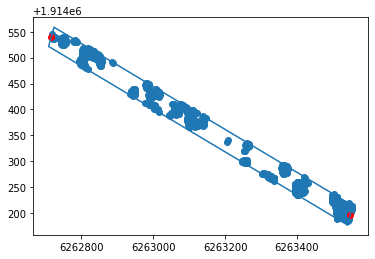

Interim pole!
Not enough points!
Not enough points!
Interim pole!
Found line.
X:  [6263530.48350444 6263336.84449983]
Y:  [1914257.43853164 1914442.97699995]


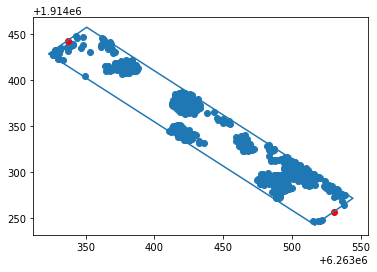

Found line.
X:  [6263530.48350444 6262895.39499927]
Y:  [1914257.43853164 1914684.38199975]


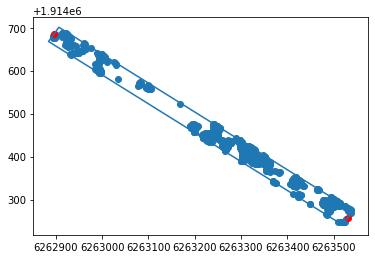

Found line.
X:  [6263530.48350444 6262716.94498921]
Y:  [1914257.43853164 1914540.0475234 ]


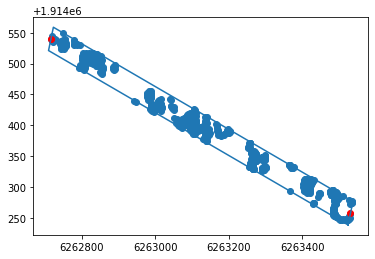

Interim pole!
Not enough points!
Not enough points!
Not enough points!
Not enough points!
Not enough points!
Not enough points!
Not enough points!
Not enough points!
Not enough points!
Found line.
X:  [6262895.39499927 6262716.94498921]
Y:  [1914684.38199975 1914540.0475234 ]


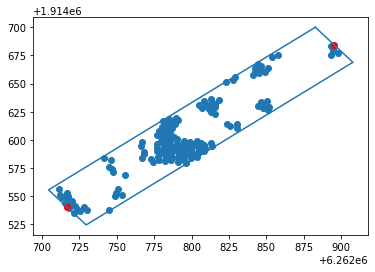

Not enough points!
Interim pole!
Not enough points!
Not enough points!
Not enough points!
Interim pole!
Interim pole!
Found line.
X:  [6262716.94498921 6262679.11749894]
Y:  [1914540.0475234 1915306.1485048]


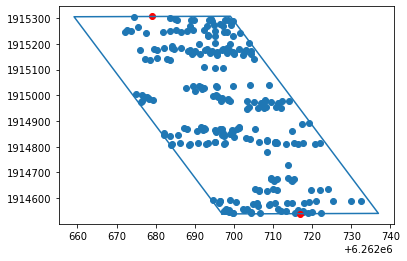

Not enough points!
Not enough points!
Found line.
X:  [6263613.50693471 6262679.11749894]
Y:  [1913960.85406254 1915306.1485048 ]


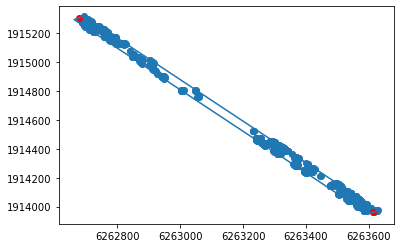

Interim pole!
Not enough points!
Not enough points!


In [78]:
#for i, j in combinations(pole_set, 2):
#    pt1 = geometric_median(X_test.loc[pole_clusters==i, ['X', 'Y']].to_numpy())
#    pt2 = geometric_median(X_test.loc[pole_clusters==j, ['X', 'Y']].to_numpy())
#    dists.loc[:, 'hold'] = point_to_line_dist(pt1, pt2, X_test.loc[:, ['X', 'Y']])
#    dists.loc[:, 'save'] = dists.loc[:, ['save', 'hold']].min(axis=1)
#X_test.loc[:, 'pole_dist'] = dists.loc[:, 'save']
from src.tools.pc_tools import check_quadrants, distance_between_two_points
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
data['wire_group'] = -1
high_points = data.loc[data.HeightAboveGround > height, ['X', 'Y']].to_numpy()
print(high_points[:5])
pole_centers = np.array([])
for pole in pole_set:
    #print(pole)
    pole_centers = np.append(pole_centers, geometric_median(data.loc[pole_clusters == pole, ['X', 'Y']].to_numpy()))
pole_centers = pole_centers.reshape(-1, 2)
for i, j in combinations(range(len(pole_centers)), 2):
    pt1 = pole_centers[i]
    pt2 = pole_centers[j]
    #print("Point1: ", pt1)
    #print("Point2: ", pt2)
    
    if distance_between_two_points(pt1, pt2) < min_pole_dist:
        print("TOO CLOSE!")
        continue

    dists = point_to_line_dist(pt1, pt2, data[['X', 'Y']])
    
    #Build box around poles
    search_area = build_box(pt1, pt2, offset)
    
    #See if other poles are in the area between i and j, if so skip this combination.
    #poles_in = X_test.loc[dists < 10, ['pole_clusters']]
    #poles_in = [x for x in poles_in if x not in (-1, i, j)]
    #if len(poles_in) > 0:
    #       continue
    oth_poles = np.array([x for k,x in enumerate(pole_centers) if k!=i and k!=j])
    if len(oth_poles) > 0:
        poles_in = whats_in_the_box(search_area, oth_poles)
        if len(poles_in) > 0:
            print("Interim pole!")
            continue
    
    #Find all elevated points within search area. 
    #This is only used for plotting purposes currently.
    points_in = whats_in_the_box(search_area, high_points)
    
    #Determine if there are points along the whole box
    quadrant_points = check_quadrants(search_area, high_points, quads = 6)
    
    skip = False
    for key in quadrant_points.keys():
        if len(quadrant_points[key]) < min_points:
            skip = True
    if skip:
        print("Not enough points!")
        continue
    
    print("Found line.")
    plot_box(search_area, points_in, pt1, pt2)
#X_test['pole_dist'] = dists['save']

In [87]:
import shapefile
w = shapefile.Writer("/media/sf_RECON/shapes/{0}/{0}".format(outfile), shapetype=1)
w.autoBalance = 1
w.field("CLASS")
for i in range(len(pole_centers)):
    w.record('POLE')
    w.point(pole_centers[i,0], pole_centers[i,1])
w.close()

In [82]:
pole_centers[3, 0]

6264518.026498388

In [83]:
pole_centers

array([[6264290.21899937, 1915465.15449942],
       [6264066.57999628, 1915093.4630002 ],
       [6264588.66949994, 1914959.88700006],
       [6264518.02649839, 1913812.52800229],
       [6264336.67900006, 1913811.12950041],
       [6264480.58895873, 1913874.071492  ],
       [6264388.46299337, 1913880.52801838],
       [6264411.18850032, 1913934.30550176],
       [6264453.18799868, 1913973.60850061],
       [6264066.1029658 , 1913950.1714947 ],
       [6264451.89946761, 1914139.18400565],
       [6264129.83800049, 1914130.70700063],
       [6264186.11849455, 1914174.98802646],
       [6263387.95400662, 1914026.99700969],
       [6264051.55098226, 1914267.23049446],
       [6263548.86449979, 1914162.11850506],
       [6263547.58849874, 1914195.86249993],
       [6263530.48350444, 1914257.43853164],
       [6263336.84449983, 1914442.97699995],
       [6262895.39499927, 1914684.38199975],
       [6262716.94498921, 1914540.0475234 ],
       [6263613.50693471, 1913960.85406254],
       [62